In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard/creditcard.csv


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, recall_score, roc_curve
from collections import Counter
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [39]:
import warnings 
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv('/kaggle/input/creditcard/creditcard.csv')

In [41]:
X = data.drop(columns = ['Class'])
print(data["Class"][20])
y = data['Class'].copy()

0


# Data Exploration


In [42]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
data.shape

(284807, 31)

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [45]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [46]:
# class = 1 implies a Fraud transaction
# class = 0 mplies not Fraud transaction
np.bincount(data['Class'])

array([284315,    492])

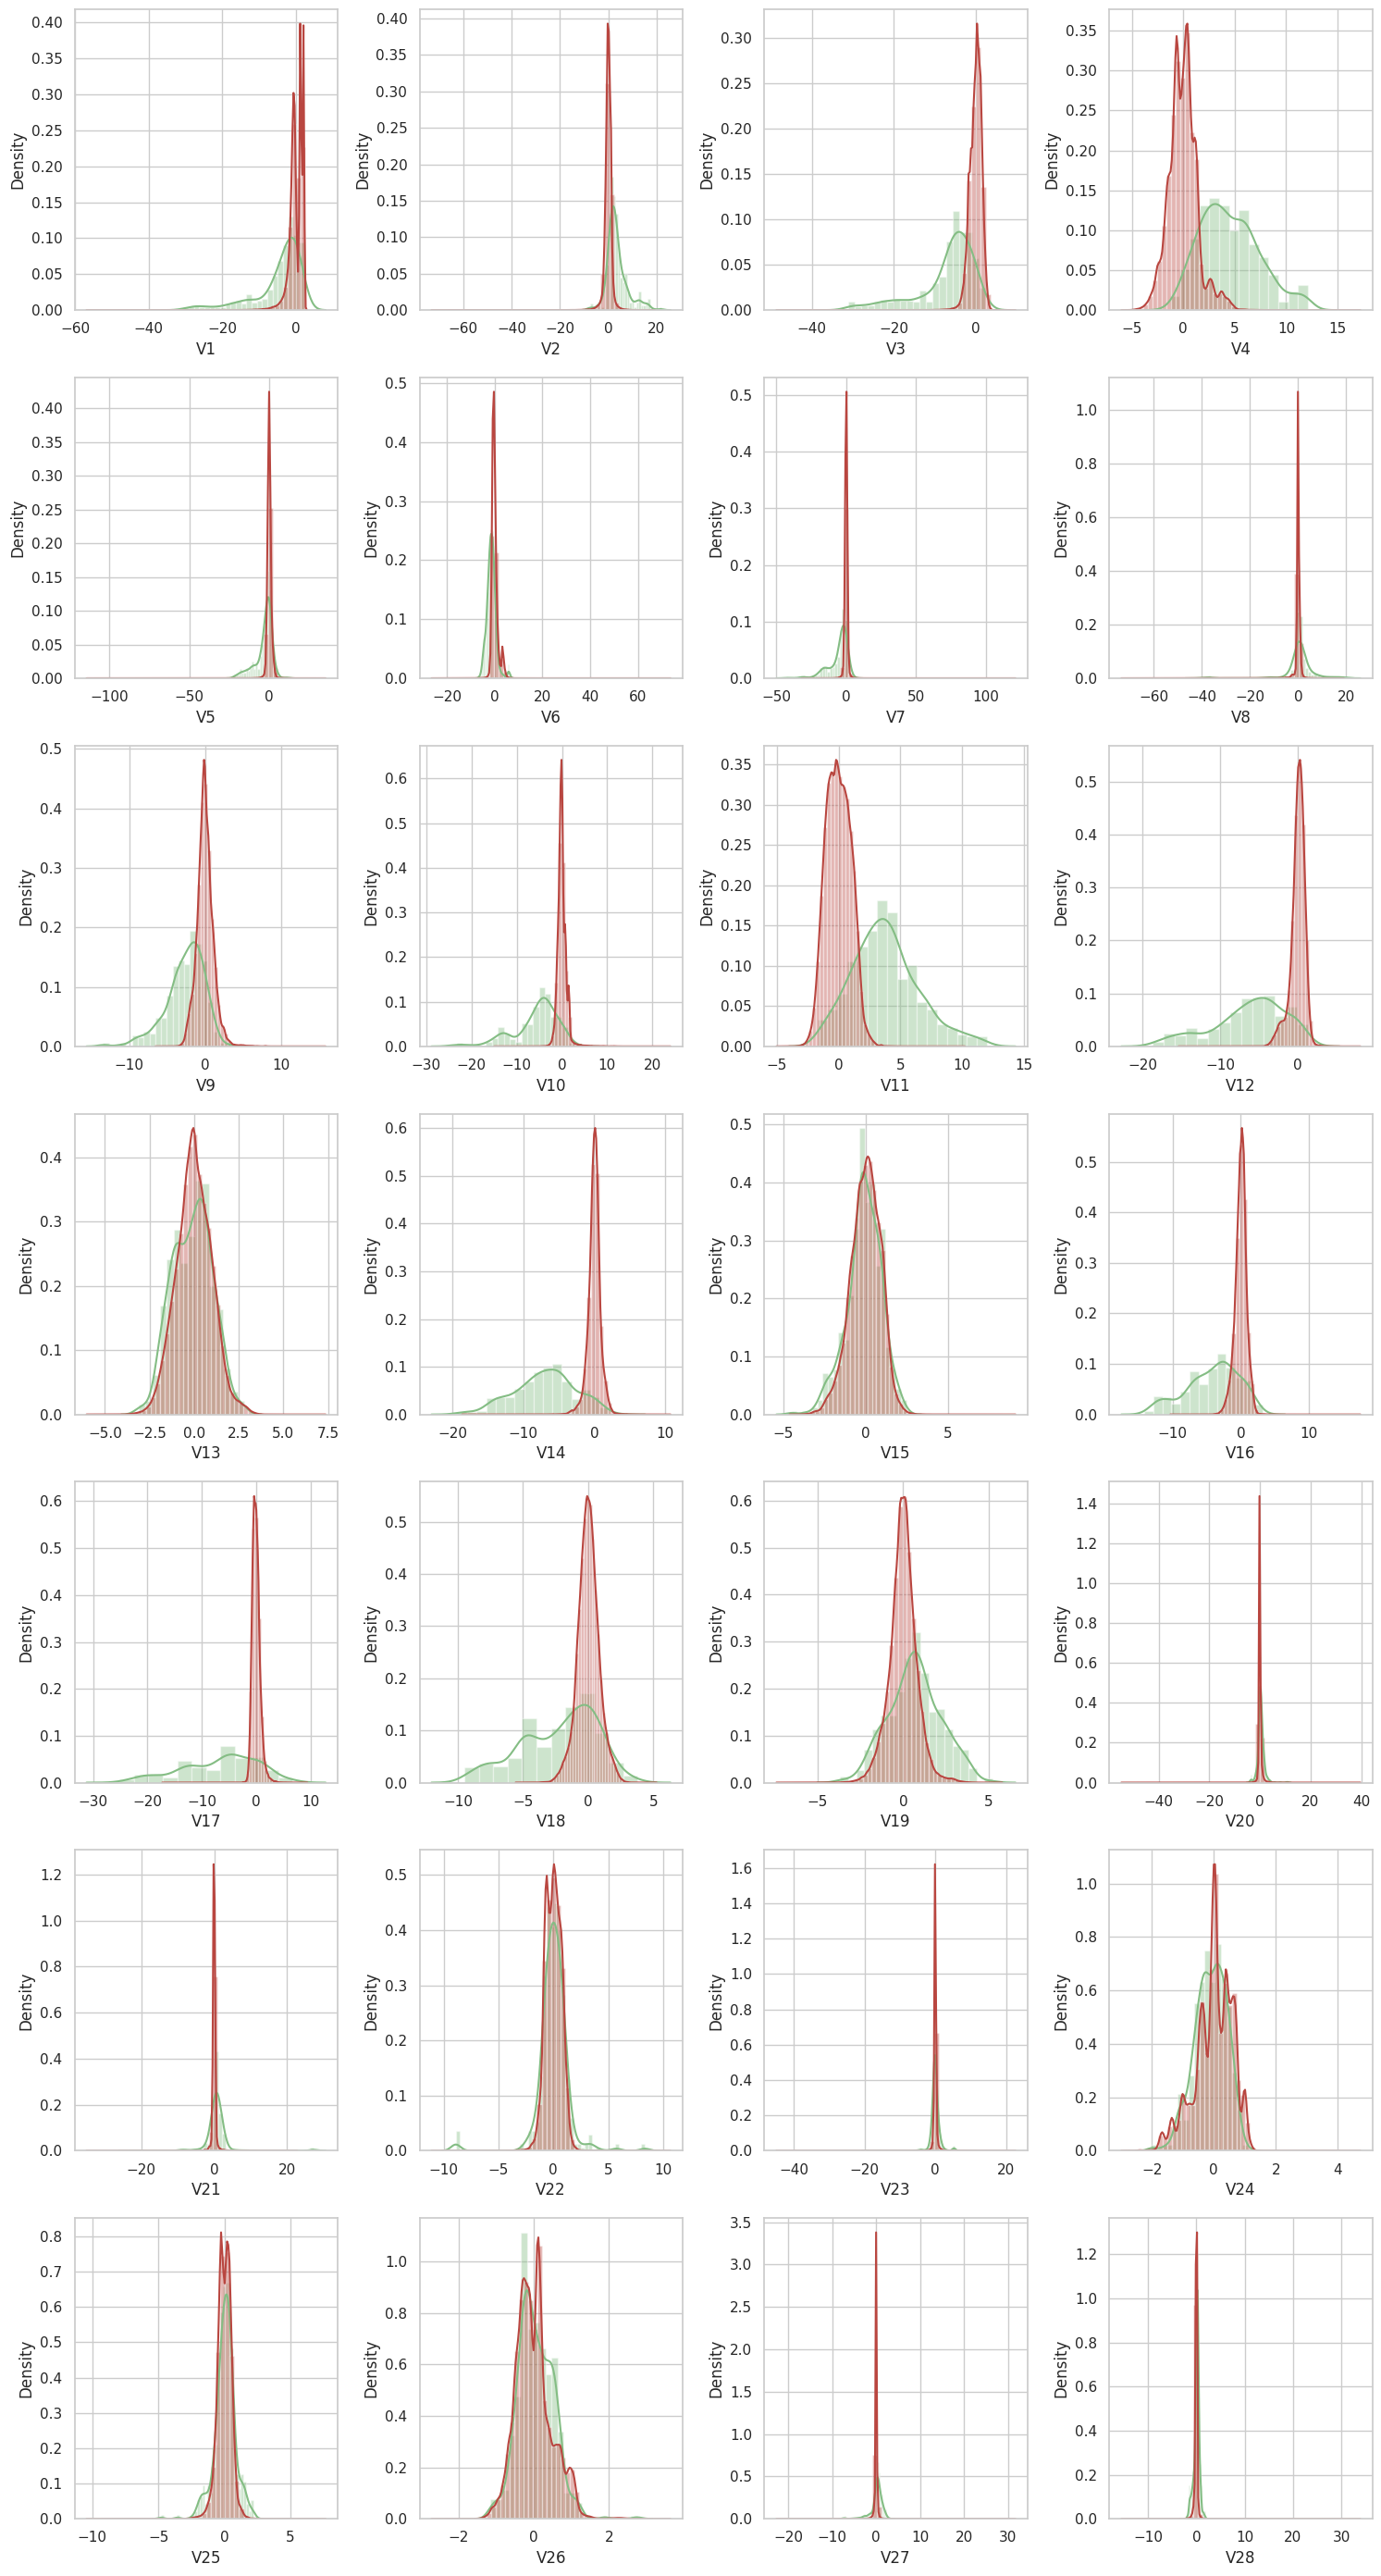

In [47]:
cols = data.columns.drop(['Class', 'Time', 'Amount'])
# print(cols)
f, ax = plt.subplots(7, 4, figsize = (15,28))

for i,c in zip(ax.flatten(), cols):
    sns.distplot(data[c][data['Class'] == 1], color = '#84bd84', ax = i)
    sns.distplot(data[c][data['Class'] == 0], color = '#b94640', ax = i)
f.tight_layout()

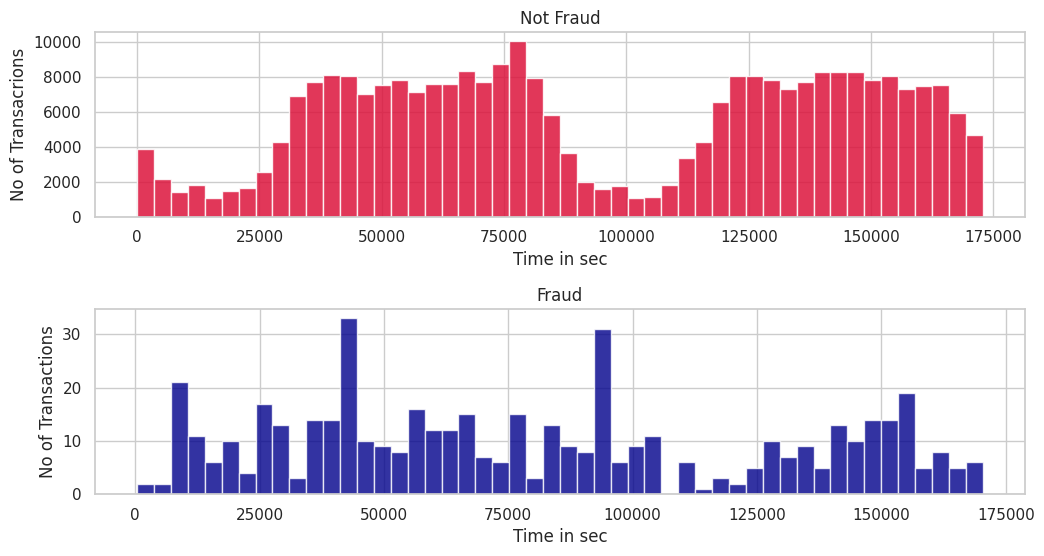

In [48]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (12, 6))
plt.subplots_adjust(hspace = .5)
ax1.hist(data['Time'][data['Class']==0],bins=50, color = 'crimson', alpha = .85)
ax1.set_xlabel('Time in sec')
ax1.set_ylabel('No of Transacrions')
ax1.set_title('Not Fraud')

ax2.hist(data['Time'][data['Class'] == 1], bins = 50, color = 'darkblue', alpha = .8)
ax2.set_xlabel('Time in sec')
ax2.set_ylabel('No of Transactions')
ax2.set_title('Fraud')
plt.show()

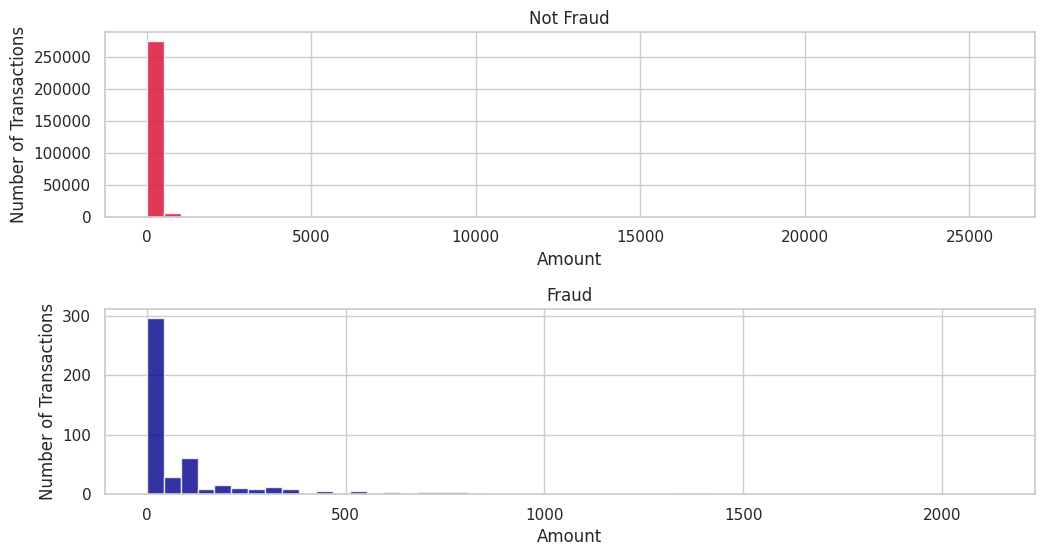

In [49]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5)
ax1.hist(data['Amount'][data['Class'] == 0], bins = 50, color = 'crimson' ,alpha = 0.85)
ax1.set_xlabel('Amount')
ax1.set_title('Not Fraud')
ax1.set_ylabel('Number of Transactions')


ax2.hist(data["Amount"][data['Class'] == 1], bins = 50, color = 'darkblue', alpha = 0.8)
ax2.set_xlabel('Amount')
ax2.set_ylabel("Number of Transactions")
ax2.set_title('Fraud')
plt.show()

In [50]:
# splitting the data
X = data.drop(['Time', 'Class'], axis = 1)
y = data['Class']

In [51]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [52]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = .2, stratify = y_train)


In [54]:
def isBalancedSplitting(y):
    counts = np.bincount(y)
    return counts[1]/sum(counts)

In [55]:
print('% of Fraud instances in Train set', isBalancedSplitting(y_train))
print('% of Fraud instances in Test set', isBalancedSplitting(y_test))
print('% of Fraud instances in Validation set', isBalancedSplitting(y_val))

% of Fraud instances in Train set 0.0017281485220215498
% of Fraud instances in Test set 0.0017204452090867595
% of Fraud instances in Validation set 0.0017336347078057452


In [56]:
X_train.shape

(182276, 29)

# Oversampling

In [57]:
def overSampling(X_train, y_train):
#     overSampling the imbalanced dataset
    overSample = SMOTE(random_state = 42,sampling_strategy =.4)
    X, y = overSample.fit_resample(X_train, y_train)
#     summarize the new class distribution
    count = Counter(y)
    print(count)
    return X,y

In [58]:
X_train, y_train = overSampling(X_train, y_train)


Counter({0: 181961, 1: 72784})


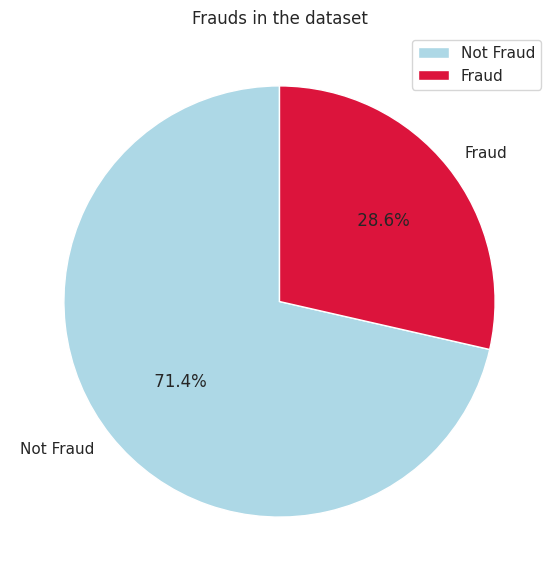

In [59]:
sns.set(style = 'whitegrid')
sizes = y_train.value_counts()
labels = ['Not Fraud','Fraud']
colors = ['lightblue', 'crimson']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels = labels, colors = colors, autopct =' %1.1f%%', startangle = 90)
plt.title('Frauds in the dataset')
plt.legend()
plt.show()

# Adding the Gaussian Noise

In [60]:
def add_noise(X_train):
    mean = 0
    sigma = .1
    noise = np.random.normal(mean, sigma, X_train.shape)
    X_train = X_train + noise
    return X_train

In [61]:
X_train_noised = add_noise(X_train)

In [62]:
y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


In [63]:
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

# Auto-encoder model

In [64]:
input_shape = X_train.shape[1] # no. of columns = 29
batch_size = 128
lr = 1e-7
epochs = 25

#  Autoencoder model
input_layer = keras.layers.Input(shape = (input_shape, ))
encoder = keras.layers.Dense(128, activation = 'relu', activity_regularizer = keras.regularizers.l1(lr), kernel_initializer = 'lecun_normal' )(input_layer)
encoder = keras.layers.Dense(64, activation = 'relu')(encoder)
encoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(64, activation = 'relu')(decoder)
decoder = keras.layers.Dense(128, activation = 'relu')(decoder)
decoder = keras.layers.Dense(29, activation = 'relu')(decoder)

autoencoder = keras.Model(inputs = input_layer, outputs = decoder)
print('k')

k


In [65]:
autoencoder.compile(metrics = ['accuracy'],
                    loss = 'mean_squared_error',
                    optimizer = 'adam')

history = autoencoder.fit(X_train_noised, X_train_noised,
                         epochs = epochs,
                         batch_size = batch_size,
                         shuffle = True,
                         validation_data = (X_val, X_val),
                         verbose = 1).history

Epoch 1/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5741 - loss: 6.9742 - val_accuracy: 0.6785 - val_loss: 0.7232
Epoch 2/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7360 - loss: 6.6582 - val_accuracy: 0.7139 - val_loss: 0.6966
Epoch 3/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7536 - loss: 6.6949 - val_accuracy: 0.7260 - val_loss: 0.6944
Epoch 4/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7656 - loss: 6.5940 - val_accuracy: 0.7067 - val_loss: 0.6998
Epoch 5/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7651 - loss: 6.6794 - val_accuracy: 0.7345 - val_loss: 0.6913
Epoch 6/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7481 - loss: 6.7753 - val_accuracy: 0.7136 - val_loss: 0.7009
Epoch 7/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7642 - loss: 6.6558 - val_accuracy: 0.6495 - val_loss: 0.7179
Epoch 8/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7601 - loss: 6.6506 - 

In [66]:
denoised_data = autoencoder.predict(X_train_noised)

7961/7961 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


# Fraud Detector Model

In [67]:
epoch = 25
batch_size = 256
input_shape = X_train.shape[1]

input_layer = keras.layers.Input(shape = (input_shape, ))
layer_1 = keras.layers.Dense(128, activation = 'relu', kernel_initializer = 'lecun_normal')(input_layer)
layer_2 = keras.layers.Dense(64, activation = 'relu',kernel_initializer = 'lecun_normal')(layer_1)
layer_3 = keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_2)
layer_4 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation = 'sigmoid')(layer_4)

fraud_dtr = keras.Model(inputs = input_layer, outputs = output_layer)

In [68]:
fraud_dtr.compile(metrics = ['accuracy'],
                  loss = 'binary_crossentropy',
                  optimizer = 'sgd' )
callback = keras.callbacks.ModelCheckpoint('Fraud_dtr_model.keras',
                                           save_best_only = True)

history = fraud_dtr.fit(denoised_data, y_train,
                        epochs = epoch,
                        batch_size = batch_size,
                        validation_data = (X_val, y_val),
                        callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8487 - loss: 0.3895 - val_accuracy: 0.9758 - val_loss: 0.0936
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9506 - loss: 0.1440 - val_accuracy: 0.9804 - val_loss: 0.0710
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9558 - loss: 0.1271 - val_accuracy: 0.9722 - val_loss: 0.0931
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9580 - loss: 0.1209 - val_accuracy: 0.9694 - val_loss: 0.0985
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9606 - loss: 0.1127 - val_accuracy: 0.9695 - val_loss: 0.0996
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9621 - loss: 0.1058 - val_accuracy: 0.9709 - val_loss: 0.0939
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9642 - loss: 0.0981 - val_accuracy: 0.9600 - val_loss: 0.1280
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9662 - loss: 0.0934 - val_accuracy: 0.

In [69]:
# load the best saved model

model = keras.models.load_model('Fraud_dtr_model.keras')

model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0672


[0.06709599494934082, 0.9824268817901611]

In [70]:
preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


# ROC-AUC Curve

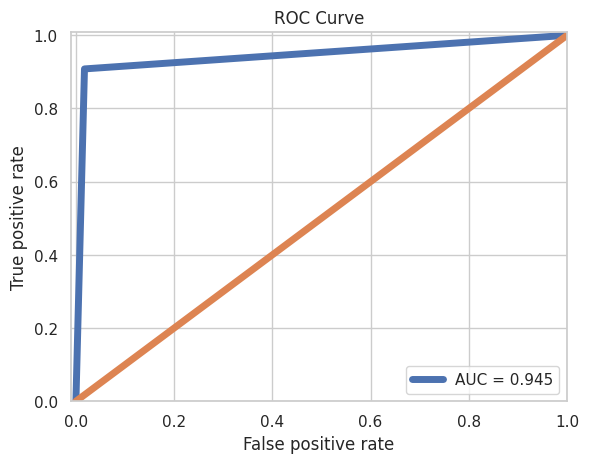

In [71]:
# Plotting the ROC-AUC Curve

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test.argmax(axis = 1), preds.argmax(axis = 1))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, linewidth = 5, label = 'AUC = %0.3f'%roc_auc)
plt.plot([0,1], [0,1], linewidth = 5)

plt.xlim([-.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc = 'lower right')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Confusion Matrix is inefficient when it comes to unbalanced dataset

In [72]:
print(f'percentage of correctly predicting the Fraud Transactions = {recall_score(y_test.argmax(axis = 1), preds.argmax(axis = 1))*100}%')

percentage of correctly predicting the Fraud Transactions = 90.81632653061224%
